In [ ]:
import os
from PIL import Image
import time
import random
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import preprocess_input

import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__, np.__version__

('2.9.2', '1.21.6')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/project

/content/drive/MyDrive/project


In [ ]:
# 옆모습 사진 삭제
# n=0
# root = './family_dataset/train_aligned'
# for i in range(len(os.listdir(root))):
#   img_id = os.listdir(os.path.join(root, f'{i}'))
#   for id in img_id:
#     if id.split('_')[-2] == '-90' or id.split('_')[-2] == '90' or id.split('_')[-2] == '-60' or id.split('_')[-2] == '60':
#       os.remove(os.path.join(root, f'{i}', id))
#       n+=1

In [ ]:
root = './family_dataset/train_aligned'
sum=0
for i in os.listdir(root):
  for n in os.listdir(root+'/'+i):
    sum+=1
print(f'총 {len(os.listdir(root))}명, {sum}개의 이미지')

총 133명, 2413개의 이미지


In [ ]:
def load_image(img):
  image = Image.open(img)
  image = image.resize((256,256))
  return image


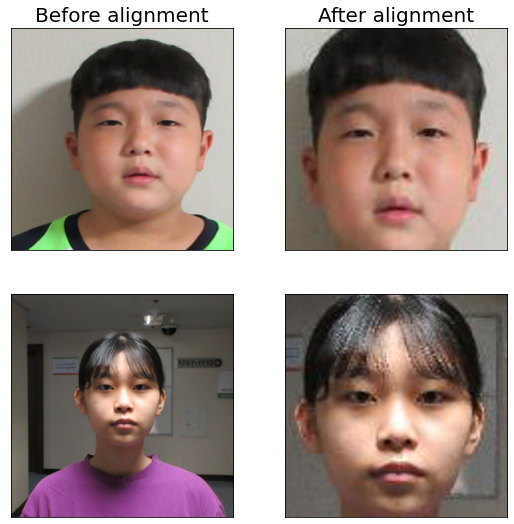

In [ ]:
# Alignment before/after

plt.figure(figsize=(9,9))
plt.subplot(221)
plt.title('Before alignment', size=20)
#plt.ylabel('Emma watson', size=15)
plt.imshow(load_image('./family_dataset/train/106/F0025_IND_S_12_0_03.JPG'))
plt.gca().axes.yaxis.set_visible(False)
plt.tick_params(
  axis='x',          # changes apply to the x-axis
  which='both',      # both major and minor ticks are affected
  bottom=False,      # ticks along the bottom edge are off
  top=False,         # ticks along the top edge are off
  labelbottom=False) # labels along the bottom edge are off

plt.subplot(222)
plt.title('After alignment', size=20)
plt.imshow(load_image('./family_dataset/train_aligned/106/F0025_IND_S_12_0_03.JPG'))
plt.gca().axes.yaxis.set_visible(False)
plt.tick_params(
  axis='x',          # changes apply to the x-axis
  which='both',      # both major and minor ticks are affected
  bottom=False,      # ticks along the bottom edge are off
  top=False,         # ticks along the top edge are off
  labelbottom=False) # labels along the bottom edge are off

plt.subplot(223)
#plt.title('after alignment')
#plt.ylabel('Tom cruise', size=15)
plt.imshow(load_image('./family_dataset/train/185/F0059_IND_D_18_0_04.JPG'))
plt.gca().axes.yaxis.set_visible(False)
plt.tick_params(
  axis='x',          # changes apply to the x-axis
  which='both',      # both major and minor ticks are affected
  bottom=False,      # ticks along the bottom edge are off
  top=False,         # ticks along the top edge are off
  labelbottom=False) # labels along the bottom edge are off

plt.subplot(224)
#plt.title('after alignment')
plt.imshow(load_image('./family_dataset/train_aligned/185/F0059_IND_D_18_0_04.JPG'))
plt.gca().axes.yaxis.set_visible(False)
plt.tick_params(
  axis='x',          # changes apply to the x-axis
  which='both',      # both major and minor ticks are affected
  bottom=False,      # ticks along the bottom edge are off
  top=False,         # ticks along the top edge are off
  labelbottom=False) # labels along the bottom edge are off

5명 test data로 사용(총 20개 이미지)

- Arianna_Huffingtion
- Harry_Schmidt
- Rita_Wilson
- Ronaldo_Luis_Nazario_de_Lima
- Yevgeny_Kafelnikov


In [ ]:
target_shape = (128,128)
def preprocess_image(filename):
    """
    Load the specified file as a JPEG image, preprocess it and
    resize it to the target shape.
    """

    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, target_shape)
    return image


def preprocess_triplets(anchor, positive, negative):
    """
    Given the filenames corresponding to the three images, load and
    preprocess them.
    """

    return (
        preprocess_image(anchor),
        preprocess_image(positive),
        preprocess_image(negative),
    )

In [ ]:
def split_dataset(directory,):# split=0.9):
    folders = os.listdir(directory)
    num_train = int(len(folders))#*split)
    random.seed(42)
    random.shuffle(folders)

    train_list = {}#, test_list = {}, {}

    # Creating Train-list
    for folder in folders:#[:num_train]:
        num_files = len(os.listdir(os.path.join(directory, folder)))
        train_list[folder] = num_files

    # # Creating Test-list
    # for folder in folders[num_train:]:
    #     num_files = len(os.listdir(os.path.join(directory, folder)))
    #     test_list[folder] = num_files
    return train_list#, test_list

ROOT = './family_dataset/train_aligned'
train_list = split_dataset(ROOT)#, test_list = split_dataset(ROOT, split=0.8)
print("Length of training list:", len(train_list))
#print("Length of testing list :", len(test_list))

# train_list, test list contains the folder names along with the number of files in the folder.
print("\nTrain List:", train_list)

Length of training list: 133

Train List: {'83': 19, '148': 9, '107': 19, '146': 11, '116': 19, '78': 20, '58': 19, '113': 19, '88': 20, '171': 20, '66': 20, '73': 16, '132': 20, '138': 12, '186': 18, '64': 20, '189': 18, '87': 20, '162': 15, '150': 19, '155': 20, '121': 20, '149': 18, '89': 19, '111': 18, '158': 20, '154': 19, '75': 20, '98': 19, '180': 19, '173': 19, '117': 17, '93': 20, '59': 17, '166': 20, '119': 18, '105': 20, '71': 18, '101': 18, '151': 20, '118': 19, '160': 20, '183': 19, '181': 20, '91': 20, '110': 19, '159': 19, '95': 20, '126': 17, '140': 9, '104': 20, '115': 19, '96': 19, '141': 13, '187': 15, '79': 15, '178': 19, '165': 19, '80': 15, '112': 20, '139': 12, '164': 19, '74': 19, '175': 19, '184': 20, '177': 19, '109': 20, '172': 18, '122': 18, '179': 17, '65': 19, '81': 20, '145': 13, '94': 19, '97': 18, '67': 17, '133': 17, '72': 20, '167': 19, '157': 20, '62': 18, '90': 18, '120': 18, '143': 13, '144': 9, '69': 17, '147': 10, '124': 19, '134': 18, '102': 20,

In [ ]:
def create_triplets(directory, folder_list,):# max_files=20):
    triplets = []
    folders = list(folder_list.keys())

    for folder in folders:
        path = os.path.join(directory, folder)
        files = list(os.listdir(path))#[:max_files]
        num_files = len(files)

        for i in range(1, num_files-1):
            for j in range(i+1, num_files):
                anchor = (folder, f"{files[i]}")
                positive = (folder, f"{files[j]}")

                neg_folder = folder
                while neg_folder == folder:

                    neg_folder = random.choice(folders)
                img_list = os.listdir(os.path.join(ROOT, neg_folder))
                neg_file = random.randint(1, folder_list[neg_folder]-1)
                negative = (neg_folder, f"{img_list[neg_file]}")

                triplets.append((anchor, positive, negative))
    random.shuffle(triplets)
    return triplets

In [ ]:
train_triplet = create_triplets(ROOT, train_list)
#test_triplet  = create_triplets(ROOT, test_list)

print("Number of training triplets:", len(train_triplet))
#print("Number of testing triplets :", len(test_triplet))

print("\nExamples of triplets:")
for i in range(5):
    print(train_triplet[i])

Number of training triplets: 18818

Examples of triplets:
(('176', 'F0056_IND_D_15_-45_04.JPG'), ('176', 'F0056_IND_D_15_15_CAM.jpg'), ('76', 'F0010_IND_GM_71_45_CAM.jpg'))
(('104', 'F0024_IND_S_16_-30_CAM.jpg'), ('104', 'F0024_IND_S_16_45_CAM.jpg'), ('133', 'F0039_IND_F_47_0_01.JPG'))
(('149', 'F0045_IND_M_43_0_02.JPG'), ('149', 'F0045_IND_M_43_45_02.JPG'), ('67', 'F0007_IND_S_15_45_04.JPG'))
(('103', 'F0024_IND_F_45_45_03.JPG'), ('103', 'F0024_IND_F_45_45_CAM.jpg'), ('157', 'F0047_IND_GM_85_0_04.JPG'))
(('155', 'F0047_IND_M_61_-45_04.JPG'), ('155', 'F0047_IND_M_61_45_CAM.jpg'), ('106', 'F0025_IND_S_12_45_02.JPG'))


In [ ]:
anchor = []
positive = []
negative = []
for i in range(len(train_triplet)):
  anchor.append(os.path.join(ROOT, train_triplet[i][0][0], train_triplet[i][0][1]))
  positive.append(os.path.join(ROOT, train_triplet[i][1][0], train_triplet[i][1][1]))
  negative.append(os.path.join(ROOT, train_triplet[i][2][0], train_triplet[i][2][1]))


In [ ]:
train_triplet[0]

(('176', 'F0056_IND_D_15_-45_04.JPG'),
 ('176', 'F0056_IND_D_15_15_CAM.jpg'),
 ('76', 'F0010_IND_GM_71_45_CAM.jpg'))

In [ ]:
anchor[0], positive[0], negative[0]

('./family_dataset/train_aligned/176/F0056_IND_D_15_-45_04.JPG',
 './family_dataset/train_aligned/176/F0056_IND_D_15_15_CAM.jpg',
 './family_dataset/train_aligned/76/F0010_IND_GM_71_45_CAM.jpg')

In [ ]:
# We need to make sure both the anchor and positive images are loaded in
# sorted order so we can match them together.
anchor_images = anchor

positive_images = positive

negative_images = negative

image_count = len(anchor_images)

anchor_dataset = tf.data.Dataset.from_tensor_slices(anchor_images)
positive_dataset = tf.data.Dataset.from_tensor_slices(positive_images)
negative_dataset = tf.data.Dataset.from_tensor_slices(negative_images)

# To generate the list of negative images, let's randomize the list of
# available images and concatenate them together.
# rng = np.random.RandomState(seed=42)
# rng.shuffle(anchor_images)
# rng.shuffle(positive_images)
# rng.shuffle(negative_images)

# negative_images = anchor_images + positive_images
# np.random.RandomState(seed=32).shuffle(negative_images)

# negative_dataset = tf.data.Dataset.from_tensor_slices(negative_images)
# negative_dataset = negative_dataset.shuffle(buffer_size=4096)

dataset = tf.data.Dataset.zip((anchor_dataset, positive_dataset, negative_dataset))
dataset = dataset.shuffle(buffer_size=1024)
dataset = dataset.map(preprocess_triplets)

# Let's now split our dataset in train and validation.
train_dataset = dataset.take(round(image_count * 0.8))
val_dataset = dataset.skip(round(image_count * 0.8))

train_dataset = train_dataset.batch(32, drop_remainder=False)
train_dataset = train_dataset.prefetch(8)

val_dataset = val_dataset.batch(32, drop_remainder=False)
val_dataset = val_dataset.prefetch(8)

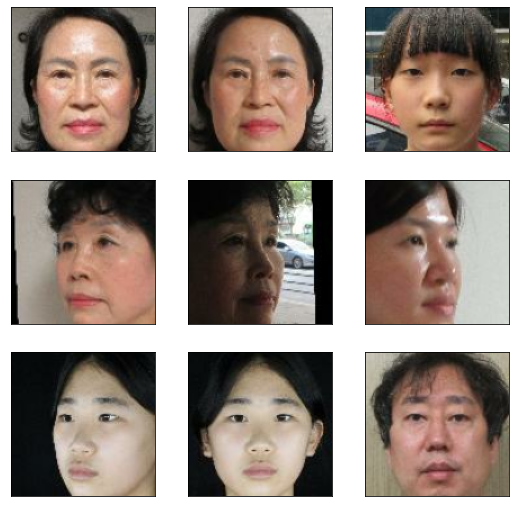

In [ ]:
def visualize(anchor, positive, negative):
    """Visualize a few triplets from the supplied batches."""

    def show(ax, image):
        ax.imshow(image)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    fig = plt.figure(figsize=(9, 9))

    axs = fig.subplots(3, 3)
    for i in range(3):
        show(axs[i, 0], anchor[i])
        show(axs[i, 1], positive[i])
        show(axs[i, 2], negative[i])


visualize(*list(train_dataset.take(1).as_numpy_iterator())[0])

## Training model

In [ ]:
from tensorflow.keras import backend, layers, metrics

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
def get_encoder(input_shape):
    """ Returns the image encoding model """

    pretrained_model = Xception(
        input_shape=input_shape,
        weights='imagenet',
        include_top=False,
        pooling='avg',
    )

    for i in range(len(pretrained_model.layers)-27):
        pretrained_model.layers[i].trainable = False

    encode_model = Sequential([
        pretrained_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))
    ], name="Encode_Model")
    return encode_model

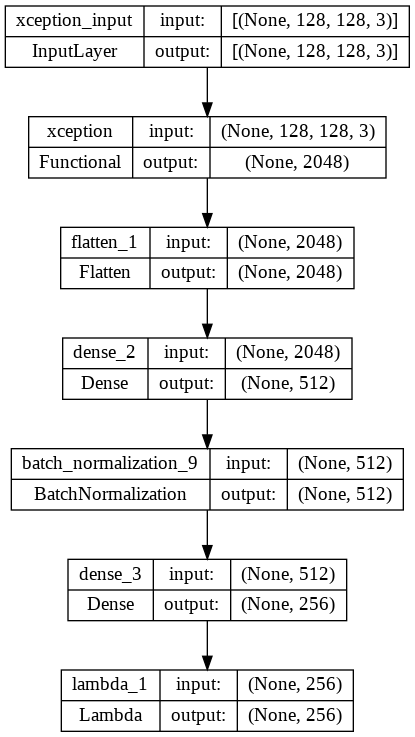

In [ ]:
plot_model(get_encoder((128, 128, 3)), show_shapes=True, show_layer_names=True)

In [ ]:
class DistanceLayer(layers.Layer):
    # A layer to compute ‖f(A) - f(P)‖² and ‖f(A) - f(N)‖²
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, positive, negative):
        ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
        an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
        return (ap_distance, an_distance)


def get_siamese_network(input_shape = (128, 128, 3)):
    encoder = get_encoder(input_shape)

    # Input Layers for the images
    anchor_input   = layers.Input(input_shape, name="Anchor_Input")
    positive_input = layers.Input(input_shape, name="Positive_Input")
    negative_input = layers.Input(input_shape, name="Negative_Input")

    ## Generate the encodings (feature vectors) for the images
    encoded_a = encoder(anchor_input)
    encoded_p = encoder(positive_input)
    encoded_n = encoder(negative_input)

    # A layer to compute ‖f(A) - f(P)‖² and ‖f(A) - f(N)‖²
    distances = DistanceLayer()(
        encoder(anchor_input),
        encoder(positive_input),
        encoder(negative_input)
    )

    # Creating the Model
    siamese_network = Model(
        inputs  = [anchor_input, positive_input, negative_input],
        outputs = distances,
        name = "Siamese_Network"
    )
    return siamese_network

siamese_network = get_siamese_network()
siamese_network.summary()

83683744/83683744 [==============================] - 4s 0us/step
Model: "Siamese_Network"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Anchor_Input (InputLayer)      [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Positive_Input (InputLayer)    [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Negative_Input (InputLayer)    [(None, 128, 128, 3  0           []                               
                   

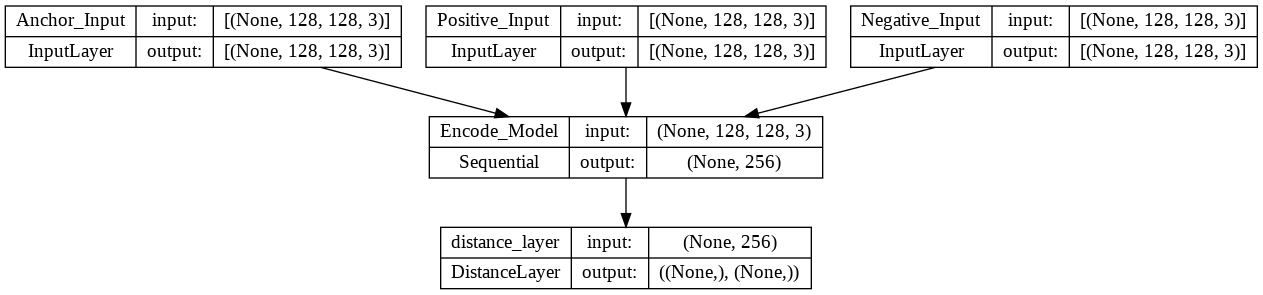

In [ ]:
plot_model(siamese_network, show_shapes=True, show_layer_names=True)

In [ ]:
class SiameseModel(Model):
    # Builds a Siamese model based on a base-model
    def __init__(self, siamese_network, margin):
        super(SiameseModel, self).__init__()

        self.margin = margin
        self.siamese_network = siamese_network
        self.loss_tracker = metrics.Mean(name="loss")

    def call(self, inputs):
        return self.siamese_network(inputs)

    def train_step(self, data):
        # GradientTape get the gradients when we compute loss, and uses them to update the weights
        with tf.GradientTape() as tape:
            loss = self._compute_loss(data)

        gradients = tape.gradient(loss, self.siamese_network.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.siamese_network.trainable_weights))

        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def test_step(self, data):
        #evaluate()
        loss = self._compute_loss(data)

        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}
        #return self.loss_tracker.result()

    def _compute_loss(self, data):
        # Get the two distances from the network, then compute the triplet loss
        ap_distance, an_distance = self.siamese_network(data)
        loss = tf.maximum(ap_distance - an_distance + self.margin, 0.0)
        return loss

    @property
    def metrics(self):
        # We need to list our metrics so the reset_states() can be called automatically.
        return [self.loss_tracker]

In [ ]:
# def acc():
#   pos_scores, neg_scores = [], []
#   for data in val_datset:
#     prediction = siamese_model.predict(data, verbose=0)
#     pos_scores += list(prediction[0])
#     neg_scores += list(prediction[1])

#   accuracy = np.sum(np.array(pos_scores) < np.array(neg_scores)) / len(pos_scores)

In [ ]:
siamese_model = SiameseModel(siamese_network, margin=1.0)
optimizer = Adam(learning_rate=1e-3, epsilon=1e-01)
siamese_model.compile(optimizer=optimizer)


In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint_path = './family_1to60-2_weights'#/{epoch:02d}.ckpt'
os.makedirs(checkpoint_path, exist_ok=True)

checkpoint = ModelCheckpoint(
    filepath = checkpoint_path+'/checkpoint.ckpt', monitor='val_loss', verbose=1,
    save_best_only=True, mode='min', save_weights_only=True
)
with tf.device('/gpu:0'):
  history = siamese_model.fit(train_dataset, epochs=30, validation_data=val_dataset, callbacks=[checkpoint])
siamese_model.save_weights(f'{checkpoint_path}/final.ckpt')

Epoch 1/30
471/471 [==============================] - ETA: 0s - loss: 0.2572


Epoch 1: val_loss improved from inf to 0.15277, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 961s 2s/step - loss: 0.2572 - val_loss: 0.1528
Epoch 2/30
471/471 [==============================] - ETA: 0s - loss: 0.1237


Epoch 2: val_loss improved from 0.15277 to 0.12281, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 141s 300ms/step - loss: 0.1237 - val_loss: 0.1228
Epoch 3/30
471/471 [==============================] - ETA: 0s - loss: 0.0784


Epoch 3: val_loss improved from 0.12281 to 0.10081, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 146s 310ms/step - loss: 0.0784 - val_loss: 0.1008
Epoch 4/30
471/471 [==============================] - ETA: 0s - loss: 0.0606


Epoch 4: val_loss improved from 0.10081 to 0.07245, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 150s 319ms/step - loss: 0.0606 - val_loss: 0.0724
Epoch 5/30
471/471 [==============================] - ETA: 0s - loss: 0.0488


Epoch 5: val_loss improved from 0.07245 to 0.05015, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 147s 311ms/step - loss: 0.0488 - val_loss: 0.0501
Epoch 6/30
471/471 [==============================] - ETA: 0s - loss: 0.0365


Epoch 6: val_loss did not improve from 0.05015
471/471 [==============================] - 142s 302ms/step - loss: 0.0365 - val_loss: 0.0529
Epoch 7/30
471/471 [==============================] - ETA: 0s - loss: 0.0315


Epoch 7: val_loss improved from 0.05015 to 0.03906, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 142s 302ms/step - loss: 0.0315 - val_loss: 0.0391
Epoch 8/30
471/471 [==============================] - ETA: 0s - loss: 0.0223


Epoch 8: val_loss improved from 0.03906 to 0.03058, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 142s 302ms/step - loss: 0.0223 - val_loss: 0.0306
Epoch 9/30
471/471 [==============================] - ETA: 0s - loss: 0.0175


Epoch 9: val_loss did not improve from 0.03058
471/471 [==============================] - 142s 302ms/step - loss: 0.0175 - val_loss: 0.0322
Epoch 10/30
471/471 [==============================] - ETA: 0s - loss: 0.0145


Epoch 10: val_loss improved from 0.03058 to 0.03000, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 144s 306ms/step - loss: 0.0145 - val_loss: 0.0300
Epoch 11/30
471/471 [==============================] - ETA: 0s - loss: 0.0130


Epoch 11: val_loss improved from 0.03000 to 0.02505, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 142s 302ms/step - loss: 0.0130 - val_loss: 0.0251
Epoch 12/30
471/471 [==============================] - ETA: 0s - loss: 0.0101


Epoch 12: val_loss did not improve from 0.02505
471/471 [==============================] - 142s 301ms/step - loss: 0.0101 - val_loss: 0.0266
Epoch 13/30
471/471 [==============================] - ETA: 0s - loss: 0.0101


Epoch 13: val_loss improved from 0.02505 to 0.02363, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 142s 301ms/step - loss: 0.0101 - val_loss: 0.0236
Epoch 14/30
471/471 [==============================] - ETA: 0s - loss: 0.0077


Epoch 14: val_loss did not improve from 0.02363
471/471 [==============================] - 142s 302ms/step - loss: 0.0077 - val_loss: 0.0259
Epoch 15/30
471/471 [==============================] - ETA: 0s - loss: 0.0067


Epoch 15: val_loss did not improve from 0.02363
471/471 [==============================] - 150s 319ms/step - loss: 0.0067 - val_loss: 0.0242
Epoch 16/30
471/471 [==============================] - ETA: 0s - loss: 0.0060


Epoch 16: val_loss improved from 0.02363 to 0.01834, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 146s 311ms/step - loss: 0.0060 - val_loss: 0.0183
Epoch 17/30
471/471 [==============================] - ETA: 0s - loss: 0.0045


Epoch 17: val_loss improved from 0.01834 to 0.01809, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 143s 304ms/step - loss: 0.0045 - val_loss: 0.0181
Epoch 18/30
471/471 [==============================] - ETA: 0s - loss: 0.0045


Epoch 18: val_loss improved from 0.01809 to 0.01586, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 143s 303ms/step - loss: 0.0045 - val_loss: 0.0159
Epoch 19/30
471/471 [==============================] - ETA: 0s - loss: 0.0039


Epoch 19: val_loss did not improve from 0.01586
471/471 [==============================] - 144s 306ms/step - loss: 0.0039 - val_loss: 0.0212
Epoch 20/30
471/471 [==============================] - ETA: 0s - loss: 0.0029


Epoch 20: val_loss improved from 0.01586 to 0.01395, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 143s 304ms/step - loss: 0.0029 - val_loss: 0.0140
Epoch 21/30
471/471 [==============================] - ETA: 0s - loss: 0.0024


Epoch 21: val_loss did not improve from 0.01395
471/471 [==============================] - 141s 300ms/step - loss: 0.0024 - val_loss: 0.0170
Epoch 22/30
471/471 [==============================] - ETA: 0s - loss: 0.0030


Epoch 22: val_loss did not improve from 0.01395
471/471 [==============================] - 142s 301ms/step - loss: 0.0030 - val_loss: 0.0163
Epoch 23/30
471/471 [==============================] - ETA: 0s - loss: 0.0021


Epoch 23: val_loss did not improve from 0.01395
471/471 [==============================] - 143s 303ms/step - loss: 0.0021 - val_loss: 0.0163
Epoch 24/30
471/471 [==============================] - ETA: 0s - loss: 0.0018


Epoch 24: val_loss did not improve from 0.01395
471/471 [==============================] - 143s 303ms/step - loss: 0.0018 - val_loss: 0.0141
Epoch 25/30
471/471 [==============================] - ETA: 0s - loss: 0.0016


Epoch 25: val_loss improved from 0.01395 to 0.01233, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 145s 308ms/step - loss: 0.0016 - val_loss: 0.0123
Epoch 26/30
471/471 [==============================] - ETA: 0s - loss: 0.0013


Epoch 26: val_loss improved from 0.01233 to 0.01171, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 144s 305ms/step - loss: 0.0013 - val_loss: 0.0117
Epoch 27/30
471/471 [==============================] - ETA: 0s - loss: 0.0011


Epoch 27: val_loss did not improve from 0.01171
471/471 [==============================] - 142s 301ms/step - loss: 0.0011 - val_loss: 0.0119
Epoch 28/30
471/471 [==============================] - ETA: 0s - loss: 9.4743e-04


Epoch 28: val_loss improved from 0.01171 to 0.01165, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 143s 305ms/step - loss: 9.4743e-04 - val_loss: 0.0116
Epoch 29/30
471/471 [==============================] - ETA: 0s - loss: 9.7748e-04


Epoch 29: val_loss improved from 0.01165 to 0.01014, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 144s 305ms/step - loss: 9.7748e-04 - val_loss: 0.0101
Epoch 30/30
471/471 [==============================] - ETA: 0s - loss: 8.6588e-04


Epoch 30: val_loss improved from 0.01014 to 0.00995, saving model to ./family_1to60-2_weights/checkpoint.ckpt
471/471 [==============================] - 142s 302ms/step - loss: 8.6588e-04 - val_loss: 0.0100


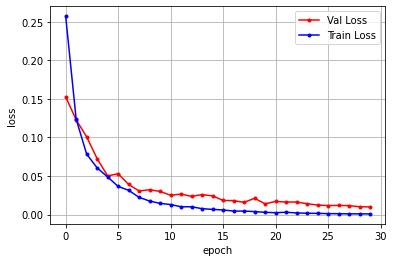

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Val Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
checkpoint_path = './family_1to60-2_weights'
siamese_model.load_weights(f'{checkpoint_path}/checkpoint.ckpt')

## Result

In [ ]:
def extract_encoder(model):
    encoder = get_encoder((128, 128, 3))
    i=0
    for e_layer in model.layers[0].layers[3].layers:
        layer_weight = e_layer.get_weights()
        encoder.layers[i].set_weights(layer_weight)
        i+=1
    return encoder

encoder = extract_encoder(siamese_model)
#encoder.save_weights("encoder-lfw_margin0")
encoder.summary()

Model: "Encode_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 batch_normalization_9 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 lambda_1 (Lambda)           (None, 256)               0         
                                                      

In [ ]:
# https://github.com/krasserm/face-recognition/blob/master/face-recognition.ipynb

import numpy as np
import os.path

class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

def load_metadata(path):
    metadata = []
    for i in sorted(os.listdir(path)):
        for f in sorted(os.listdir(os.path.join(path, i))):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg' or ext =='.JPG':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('./family_dataset/test_aligned')

In [ ]:
# 1명당 6장씩 25명 총 150장

for img in metadata:

  print(img.image_path())

./family_dataset/test_aligned/0/F0861_IND_F_55_-45_01.JPG
./family_dataset/test_aligned/0/F0861_IND_F_55_-45_02.JPG
./family_dataset/test_aligned/0/F0861_IND_F_55_0_01.JPG
./family_dataset/test_aligned/0/F0861_IND_F_55_0_02.JPG
./family_dataset/test_aligned/0/F0861_IND_F_55_45_01.JPG
./family_dataset/test_aligned/0/F0861_IND_F_55_45_02.JPG
./family_dataset/test_aligned/1/F0861_IND_S_25_-45_01.JPG
./family_dataset/test_aligned/1/F0861_IND_S_25_-45_02.JPG
./family_dataset/test_aligned/1/F0861_IND_S_25_0_01.JPG
./family_dataset/test_aligned/1/F0861_IND_S_25_0_02.JPG
./family_dataset/test_aligned/1/F0861_IND_S_25_45_01.JPG
./family_dataset/test_aligned/1/F0861_IND_S_25_45_02.JPG
./family_dataset/test_aligned/10/F0876_IND_F_40_-45_01.JPG
./family_dataset/test_aligned/10/F0876_IND_F_40_-45_02.JPG
./family_dataset/test_aligned/10/F0876_IND_F_40_0_01.JPG
./family_dataset/test_aligned/10/F0876_IND_F_40_0_02.JPG
./family_dataset/test_aligned/10/F0876_IND_F_40_45_01.JPG
./family_dataset/test_alig

In [ ]:
# https://keras.io/examples/vision/siamese_network/

def preprocess_image(filename):
    """
    Load the specified file as a JPEG image, preprocess it and
    resize it to the target shape.
    """

    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)

    #Converting integer types to floating point types returns normalized floating point values in the range [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)

    image = tf.image.resize(image,(128,128))

    image = tf.expand_dims(image, axis=0)

    return image

In [ ]:
# https://github.com/krasserm/face-recognition/blob/master/face-recognition.ipynb

embedded = np.zeros((metadata.shape[0], 256))

for i, m in enumerate(metadata):
    #align_mtcnn.get_aligned_face의 output은 image > array 형식으로 변환
    img = preprocess_image(m.image_path())

    # obtain embedding vector for image
    embedded[i] = encoder.predict(img, verbose=0)[0]

- 동일인물

In [ ]:
# https://github.com/krasserm/face-recognition/blob/master/face-recognition.ipynb

def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embedded[idx1], embedded[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.xlabel(metadata[idx1].image_path().split('/')[-2])
    plt.gca().axes.yaxis.set_visible(False)
    plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,         # ticks along the top edge are off
      labelbottom=False) # labels along the bottom edge are off

    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()))
    plt.xlabel(metadata[idx2].image_path().split('/')[-2])
    plt.gca().axes.yaxis.set_visible(False)
    plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,         # ticks along the top edge are off
      labelbottom=False) # labels along the bottom edge are off

i=0
for _ in range(25):

  show_pair(2+i, 3+i)
  i+=6

- 다른 인물

In [ ]:
# https://github.com/krasserm/face-recognition/blob/master/face-recognition.ipynb

def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embedded[idx1], embedded[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.xlabel(metadata[idx1].image_path().split('/')[-2])
    plt.gca().axes.yaxis.set_visible(False)
    plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,         # ticks along the top edge are off
      labelbottom=False) # labels along the bottom edge are off

    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()))
    plt.xlabel(metadata[idx2].image_path().split('/')[-2])
    plt.gca().axes.yaxis.set_visible(False)
    plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,         # ticks along the top edge are off
      labelbottom=False) # labels along the bottom edge are off

i=0
for _ in range(24):
  show_pair(2+i, 8+i)
  i+=6

### distance threshold를 0.94로 설정

*   accuracy : 약 0.947


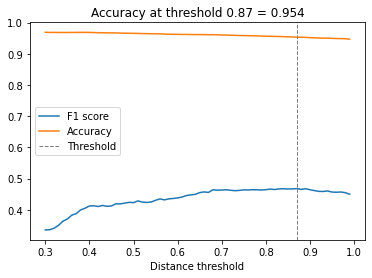

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

distances = [] # squared L2 distance between pairs
identical = [] # 1 if same identity, 0 otherwise

num = len(metadata)

for i in range(num - 1):
    for j in range(i + 1, num):
        distances.append(distance(embedded[i], embedded[j]))
        identical.append(1 if metadata[i].name == metadata[j].name else 0)

distances = np.array(distances)
identical = np.array(identical)

thresholds = np.arange(0.3, 1.0, 0.01)

f1_scores = [f1_score(identical, distances < t) for t in thresholds]
acc_scores = [accuracy_score(identical, distances < t) for t in thresholds]

opt_idx = np.argmax(f1_scores)
# Threshold at maximal F1 score
opt_tau = thresholds[opt_idx]
# Accuracy at maximal F1 score
opt_acc = accuracy_score(identical, distances < opt_tau)

# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, f1_scores, label='F1 score');
plt.plot(thresholds, acc_scores, label='Accuracy');
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='grey', label='Threshold')
plt.title(f'Accuracy at threshold {opt_tau:.2f} = {opt_acc:.3f}');
plt.xlabel('Distance threshold')
plt.legend();


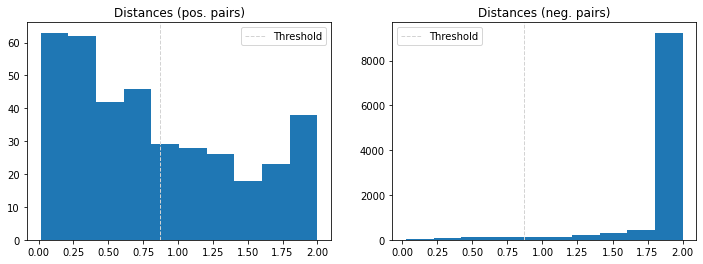

In [ ]:
dist_pos = distances[identical == 1]
dist_neg = distances[identical == 0]

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.hist(dist_pos)
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title('Distances (pos. pairs)')
plt.legend();

plt.subplot(122)
plt.hist(dist_neg)
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title('Distances (neg. pairs)')
plt.legend();

## 인물 예측
 - KNN, SVM이외 모델 사용가능

In [ ]:
def extract_encoder(model):
    encoder = get_encoder((128, 128, 3))
    i=0
    for e_layer in model.layers[0].layers[3].layers:
        layer_weight = e_layer.get_weights()
        encoder.layers[i].set_weights(layer_weight)
        i+=1
    return encoder

encoder = extract_encoder(siamese_model)
#encoder.save_weights("encoder-lfw_margin0")
encoder.summary()

Model: "Encode_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 batch_normalization_19 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 lambda_3 (Lambda)           (None, 256)               0         
                                                      

In [ ]:
train_idx = np.arange(metadata.shape[0]) % 2 != 0
test_idx = np.arange(metadata.shape[0]) % 2 == 0

test_list = metadata[test_idx]
test_list = [item for item in test_list if item.image_path().split('_')[-2]=='0']
test_list

[./family_dataset/test_aligned/0/F0861_IND_F_55_0_01.JPG,
 ./family_dataset/test_aligned/1/F0861_IND_S_25_0_01.JPG,
 ./family_dataset/test_aligned/10/F0876_IND_F_40_0_01.JPG,
 ./family_dataset/test_aligned/11/F0876_IND_M_34_0_01.JPG,
 ./family_dataset/test_aligned/12/F0876_IND_D_9_0_01.JPG,
 ./family_dataset/test_aligned/13/F0883_IND_F_41_0_01.JPG,
 ./family_dataset/test_aligned/14/F0823_IND_S_26_0_01.JPG,
 ./family_dataset/test_aligned/15/F0884_IND_M_41_0_01.JPG,
 ./family_dataset/test_aligned/16/F0884_IND_S_12_0_01.JPG,
 ./family_dataset/test_aligned/17/F0891_IND_F_52_0_01.JPG,
 ./family_dataset/test_aligned/18/F0891_IND_S_17_0_01.JPG,
 ./family_dataset/test_aligned/19/F0891_IND_D_14_0_01.JPG,
 ./family_dataset/test_aligned/2/F0861_IND_D_21_0_01.JPG,
 ./family_dataset/test_aligned/20/F0893_IND_F_53_0_01.JPG,
 ./family_dataset/test_aligned/21/F0893_IND_D_19_0_01.JPG,
 ./family_dataset/test_aligned/22/F0900_IND_F_59_0_01.JPG,
 ./family_dataset/test_aligned/23/F0900_IND_M_57_0_01.JPG,
 

In [ ]:
# https://github.com/krasserm/face-recognition/blob/master/face-recognition.ipynb

# test_embedded = np.zeros((len(test_list), 256))

# for i, m in enumerate(test_list):
#     #align_mtcnn.get_aligned_face의 output은 image > array 형식으로 변환
#     img = preprocess_image(m.image_path())

#     # obtain embedding vector for image
#     test_embedded[i] = encoder.predict(img, verbose=0)[0]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

targets = np.array([m.name for m in metadata])

encoder = LabelEncoder()
encoder.fit(targets)

# Numerical encoding of identities
y = encoder.transform(targets)

train_idx = np.arange(metadata.shape[0]) % 2 == 0
test_idx = np.arange(metadata.shape[0]) % 2 != 0

# 50 train examples of 10 identities (5 examples each)
X_train = embedded[train_idx]
# 50 test examples of 10 identities (5 examples each)
X_test = embedded[test_idx]

y_train = y[train_idx]
y_test = y[test_idx]

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svc = LinearSVC()
rfc = RandomForestClassifier(random_state=0)

knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

acc_knn = accuracy_score(y_test, knn.predict(X_test))
acc_svc = accuracy_score(y_test, svc.predict(X_test))
acc_rfc = accuracy_score(y_test, rfc.predict(X_test))

print(f'KNN accuracy = {acc_knn}, SVM accuracy = {acc_svc}, RF accuracy = {acc_rfc}')

KNN accuracy = 0.6133333333333333, SVM accuracy = 0.6, RF accuracy = 0.6533333333333333


In [ ]:
# # 총 25개중 18개 제대로 예측 > 72%

# fig = plt.figure(figsize=(25,25))
# #fig.subplots_adjust(hspace=1)
# for i in range(1,26):
#   plt.subplot(5,5,i)
#   plt.subplots_adjust(hspace=0.5)
#   example_image = load_image(test_list[i-1].image_path())
#   example_prediction = svc.predict([test_embedded[i-1]])
#   example_identity = encoder.inverse_transform(example_prediction)[0]
#   plt.imshow(example_image)
#   plt.gca().axes.yaxis.set_visible(False)
#   plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off
#   plt.title(f'Recognized as {example_identity}');
#   plt.xlabel(f'Actual {test_list[i-1].image_path().split("/")[-2]}',size=13)


In [ ]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

In [ ]:
front = range(1,75,3)
left = range(0,75,3)
right = range(2,75,3)

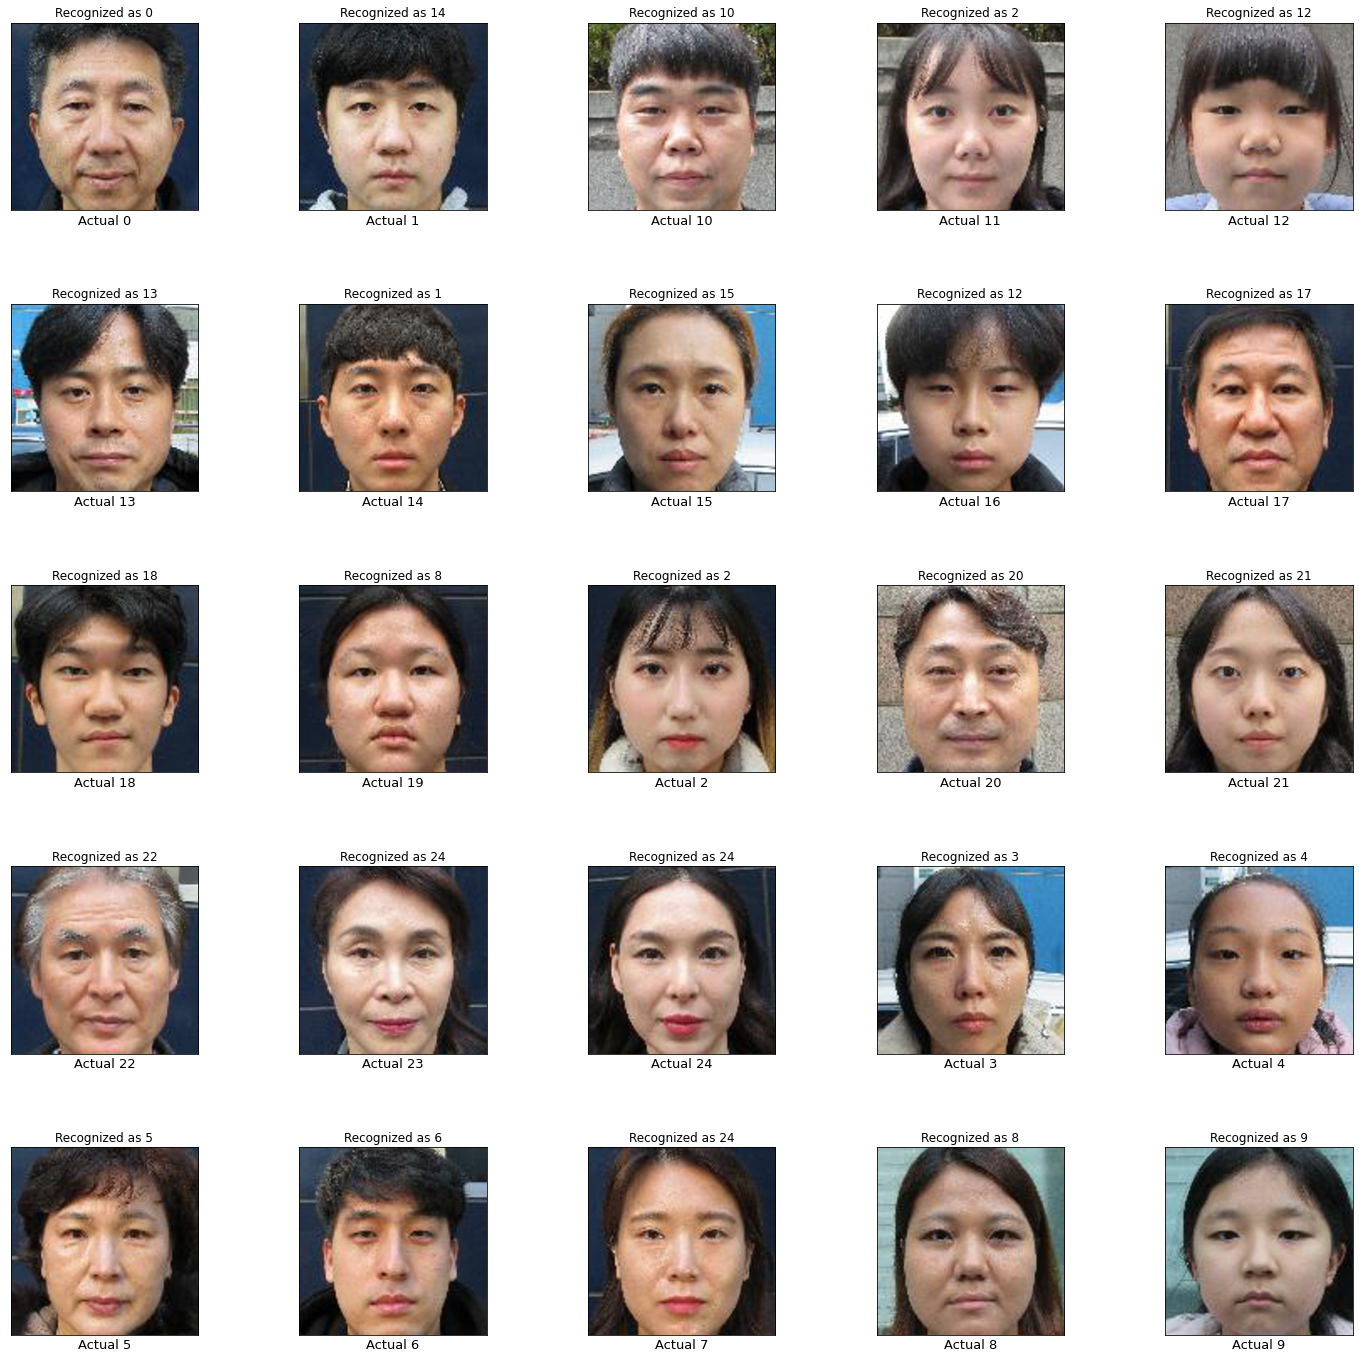

In [ ]:
#25명 중 18명 제대로 인식 > 72%

fig = plt.figure(figsize=(25,50))
for n, idx in enumerate(front):
  plt.subplot(10,5,n+1)
  plt.subplots_adjust(hspace=0.5)
  example_idx = idx
  example_image = load_image(metadata[test_idx][example_idx].image_path())
  example_prediction = rfc.predict([embedded[test_idx][example_idx]])
  example_identity = encoder.inverse_transform(example_prediction)[0]

  plt.imshow(example_image)
  plt.gca().axes.yaxis.set_visible(False)
  plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are 무
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
  plt.title(f'Recognized as {example_identity}');
  plt.xlabel(f'Actual {metadata[test_idx][example_idx].image_path().split("/")[-2]}',size=13)

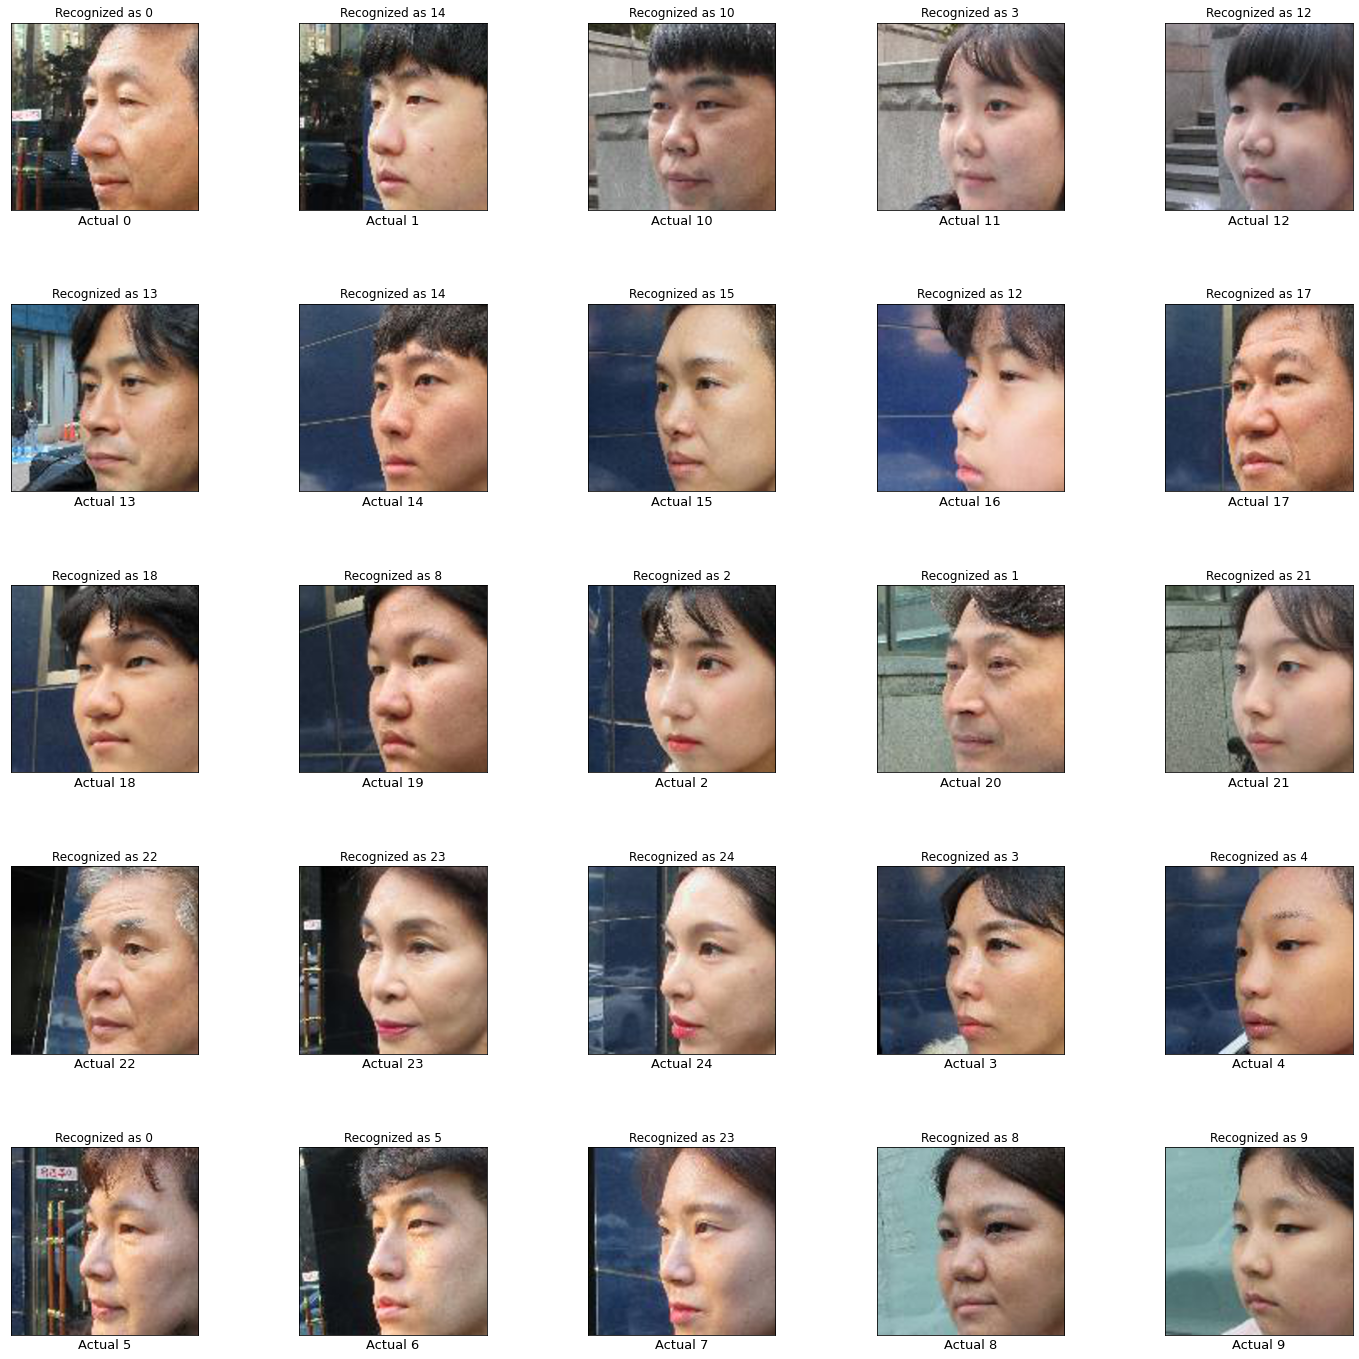

In [ ]:
#25명 중 17명 제대로 인식 >68%

fig = plt.figure(figsize=(25,50))
for n, idx in enumerate(left):
  plt.subplot(10,5,n+1)
  plt.subplots_adjust(hspace=0.5)
  example_idx = idx
  example_image = load_image(metadata[test_idx][example_idx].image_path())
  example_prediction = rfc.predict([embedded[test_idx][example_idx]])
  example_identity = encoder.inverse_transform(example_prediction)[0]

  plt.imshow(example_image)
  plt.gca().axes.yaxis.set_visible(False)
  plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
  plt.title(f'Recognized as {example_identity}');
  plt.xlabel(f'Actual {metadata[test_idx][example_idx].image_path().split("/")[-2]}',size=13)

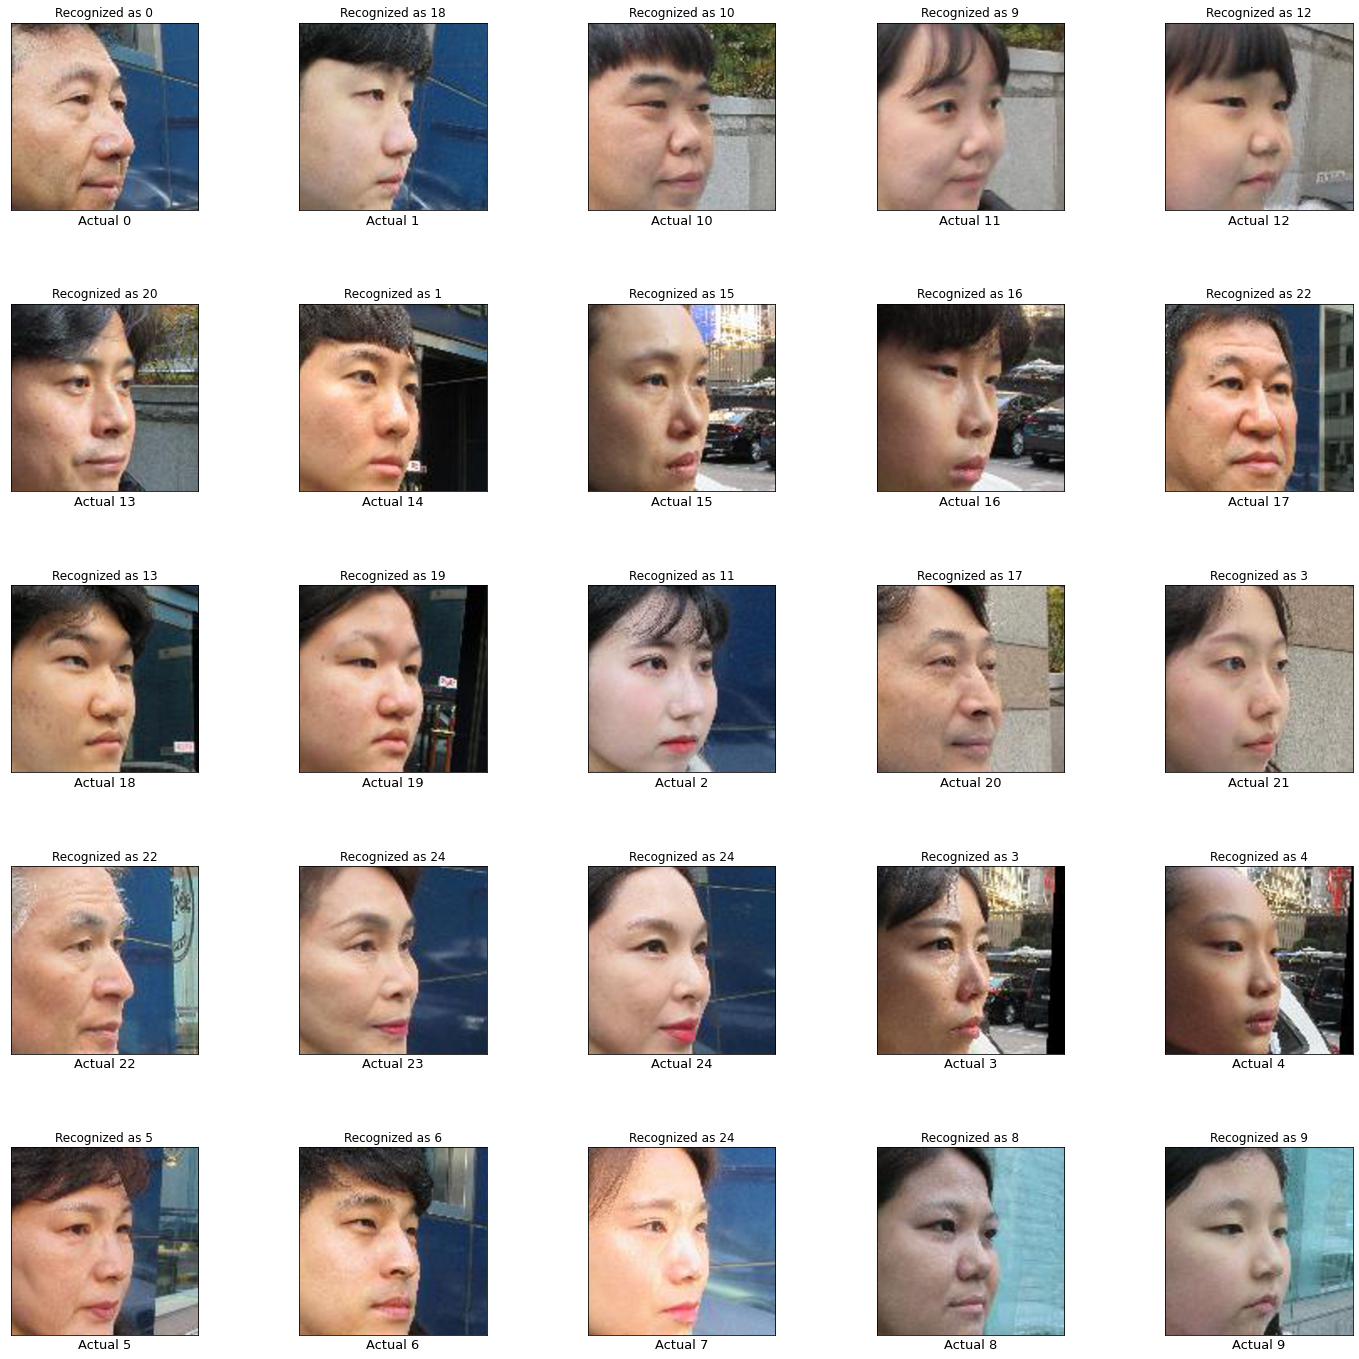

In [ ]:
#25명중 14명 인식 > 56%

fig = plt.figure(figsize=(25,50))
for n, idx in enumerate(right):
  plt.subplot(10,5,n+1)
  plt.subplots_adjust(hspace=0.5)
  example_idx = idx
  example_image = load_image(metadata[test_idx][example_idx].image_path())
  example_prediction = rfc.predict([embedded[test_idx][example_idx]])
  example_identity = encoder.inverse_transform(example_prediction)[0]

  plt.imshow(example_image)
  plt.gca().axes.yaxis.set_visible(False)
  plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
  plt.title(f'Recognized as {example_identity}');
  plt.xlabel(f'Actual {metadata[test_idx][example_idx].image_path().split("/")[-2]}',size=13)